In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from matplotlib.ticker import FuncFormatter

In [2]:
education = pd.read_csv('educational_attainment - Sheet1.csv')

education

,Country,All Adults,Less than 9th Grade,9th-12th Grade,High School Diploma or Equivalent,Some College or Associate's Degree,Bachelor's Degree or Higher
0,U.S. Born,"189,038,000",2%,5%,27%,30%,36%
1,All immigrants,"40,741,000",16%,9%,22%,18%,35%
2,Recently Arrived Immigrants,"1,945,000",12%,7%,19%,13%,48%
3,Mexico,"288,000",27%,15%,24%,11%,24%
4,India,"215,000",3%,3%,4%,4%,86%
5,China/Hong Kong,"94,000",9%,4%,17%,11%,60%
6,Venezuela,"84,000",6%,4%,22%,22%,46%
7,Cuba,"68,000",4%,16%,37%,15%,28%
8,Colombia,"67,000",8%,5%,22%,21%,44%
9,Brazil,"60,000",10%,6%,25%,10%,49%


In [3]:
education.columns

Index(['Country', 'All Adults', 'Less than 9th Grade', '9th-12th Grade',
       'High School Diploma or Equivalent',
       'Some College or Associate's Degree', 'Bachelor's Degree or Higher'],
      dtype='object')

In [4]:
def remove_percent(df, columns):
    for column in columns:
        df[column] = df[column].str.replace('%', '').astype(float)
    return df

# List of columns to remove '%' from
columns_to_remove_percent = ['Less than 9th Grade', '9th-12th Grade',
       'High School Diploma or Equivalent',
       "Some College or Associate's Degree", "Bachelor's Degree or Higher"]

# Apply the function
df_cleaned = remove_percent(education.copy(), columns_to_remove_percent)

df_cleaned

,Country,All Adults,Less than 9th Grade,9th-12th Grade,High School Diploma or Equivalent,Some College or Associate's Degree,Bachelor's Degree or Higher
0,U.S. Born,"189,038,000",2.0,5.0,27.0,30.0,36.0
1,All immigrants,"40,741,000",16.0,9.0,22.0,18.0,35.0
2,Recently Arrived Immigrants,"1,945,000",12.0,7.0,19.0,13.0,48.0
3,Mexico,"288,000",27.0,15.0,24.0,11.0,24.0
4,India,"215,000",3.0,3.0,4.0,4.0,86.0
5,China/Hong Kong,"94,000",9.0,4.0,17.0,11.0,60.0
6,Venezuela,"84,000",6.0,4.0,22.0,22.0,46.0
7,Cuba,"68,000",4.0,16.0,37.0,15.0,28.0
8,Colombia,"67,000",8.0,5.0,22.0,21.0,44.0
9,Brazil,"60,000",10.0,6.0,25.0,10.0,49.0


In [5]:
children = pd.read_csv("Unnacompanied_children - Sheet1.csv")

children

,State,FY 2014,FY 2015,FY 2016,FY 2017,FY 2018,FY 2019,FY 2020,FY 2021,FY 2022,FY 2023 YTD*,FY 2014 - 2023 YTD* Total
0,United States,"53,515","27,840","52,147","42,497","34,953","72,837","16,837","107,686","127,447","101,871","637,630"
1,Alabama,786,808,870,598,736,"1,111",247,"1,946","2,378","1,821","11,301"
2,Alaska,4,2,5,3,-,4,-,4,6,6,34
3,Arizona,295,167,330,322,258,493,162,631,782,762,"4,202"
4,Arkansas,307,186,309,272,193,359,87,790,926,788,"4,217"
5,California,"5,831","3,629","7,381","6,268","4,675","8,447","2,225","10,773","13,730","10,073","73,032"
6,Colorado,426,248,427,379,313,714,172,"1,088","1,424","1,430","6,621"
7,Connecticut,552,206,454,412,332,959,260,"1,447","1,302","1,114","7,038"
8,Delaware,212,152,275,178,222,383,107,519,573,470,"3,091"
9,District of Columbia,375,201,432,294,138,322,48,307,421,312,"2,850"


In [6]:
refugees = pd.read_csv("Refugge_resettlement - Sheet1.csv")

refugees

,Year,Annual Ceiling,Number of Admitted Refugees
0,1975,-,"146,158"
1,1976,-,"27,206"
2,1977,-,"19,946"
3,1978,-,"36,507"
4,1979,-,"111,363"
5,1980,"231,700","207,116"
6,1981,"217,000","159,252"
7,1982,"140,000","98,096"
8,1983,"90,000","61,218"
9,1984,"72,000","70,393"


In [7]:
immigrant_state = pd.read_csv("Immigrant_pop_state - Sheet1.csv")

immigrant_state

,Country,Total Population,Immigrant Population,Immigrant Share of Total State Population,Year
0,United States,"248,709,900","19,767,300",7.90%,1990
1,Alabama,"4,040,600","43,500",1.10%,1990
2,Alaska,"550,000","24,800",4.50%,1990
3,Arizona,"3,665,200","278,200",7.60%,1990
4,Arkansas,"2,350,700","24,900",1.10%,1990
...,...,...,...,...,...
307,Virginia,"8,684,000","1,105,000",12.70%,2022
308,Washington,"7,786,000","1,188,000",15.30%,2022
309,West Virginia,"1,775,000","32,000",1.80%,2022
310,Wisconsin,"5,893,000","295,000",5.00%,2022


In [8]:
immigrant_state['Immigrant Share of Total State Population'] = immigrant_state['Immigrant Share of Total State Population'].str.replace('%','').astype(float)

immigrant_state

,Country,Total Population,Immigrant Population,Immigrant Share of Total State Population,Year
0,United States,"248,709,900","19,767,300",7.9,1990
1,Alabama,"4,040,600","43,500",1.1,1990
2,Alaska,"550,000","24,800",4.5,1990
3,Arizona,"3,665,200","278,200",7.6,1990
4,Arkansas,"2,350,700","24,900",1.1,1990
...,...,...,...,...,...
307,Virginia,"8,684,000","1,105,000",12.7,2022
308,Washington,"7,786,000","1,188,000",15.3,2022
309,West Virginia,"1,775,000","32,000",1.8,2022
310,Wisconsin,"5,893,000","295,000",5.0,2022


In [9]:
legal_country = pd.read_csv("new_legals_country - Sheet1.csv")

legal_country

,Region/Sub-Region or Country of Birth,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,All Countries (total),"644,787","841,002","1,058,902","1,059,356","703,542","957,883","1,122,257","1,266,129","1,052,415",...,"990,553","1,016,518","1,051,031","1,183,505","1,127,167","1,096,611","1,031,765","707,362","740,002","1,018,349"
1,Africa,"36,572","44,529","53,723","60,094","48,633","66,412","85,091","117,416","94,709",...,"98,304","98,413","101,415","113,426","118,824","115,736","111,194","76,649","66,211","89,571"
2,Eastern Africa,"8,839","10,778","13,373","18,426","14,901","21,266","26,530","41,295","31,731",...,"30,044","30,241","31,618","35,047","39,311","39,582","32,137","22,084","14,734","21,520"
3,Burundi,16,28,79,120,74,100,186,320,257,...,260,273,351,415,"1,094",762,781,"1,099",730,788
4,Comoros,X,X,X,X,X,X,6,7,7,...,D,9,5,4,4,8,10,4,4,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,American Samoa,11,7,28,26,16,12,15,28,11,...,D,-,-,-,D,D,-,-,-,-
237,French Polynesia,9,13,16,12,14,13,19,37,27,...,-,24,14,27,20,10,25,15,12,51
238,Marshall Islands,3,3,D,26,26,48,32,53,48,...,46,56,32,32,23,23,22,12,12,15
239,Samoa,91,184,165,157,178,203,173,283,290,...,237,239,207,219,194,179,195,154,130,139


In [10]:
unauthorized_estimates = pd.read_csv("Unauthorized_estimates - Sheet1.csv")

unauthorized_estimates['State Share of the Total Unauthorized Immigrant Population'] = unauthorized_estimates['State Share of the Total Unauthorized Immigrant Population'].str.replace('%','').astype(float)

unauthorized_estimates

,State,Number of Unauthorized Immigrants,State Share of the Total Unauthorized Immigrant Population
0,United States,"11,047,000",100.0
1,California,"2,739,000",24.8
2,Texas,"1,739,000",15.7
3,New York,"835,000",7.6
4,Florida,"772,000",7.0
5,New Jersey,"440,000",4.0
6,Illinois,"425,000",3.8
7,Georgia,"339,000",3.1
8,North Carolina,"296,000",2.7
9,Arizona,"273,000",2.5


In [12]:
legal_country

,Region/Sub-Region or Country of Birth,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,All Countries (total),"644,787","841,002","1,058,902","1,059,356","703,542","957,883","1,122,257","1,266,129","1,052,415",...,"990,553","1,016,518","1,051,031","1,183,505","1,127,167","1,096,611","1,031,765","707,362","740,002","1,018,349"
1,Africa,"36,572","44,529","53,723","60,094","48,633","66,412","85,091","117,416","94,709",...,"98,304","98,413","101,415","113,426","118,824","115,736","111,194","76,649","66,211","89,571"
2,Eastern Africa,"8,839","10,778","13,373","18,426","14,901","21,266","26,530","41,295","31,731",...,"30,044","30,241","31,618","35,047","39,311","39,582","32,137","22,084","14,734","21,520"
3,Burundi,16,28,79,120,74,100,186,320,257,...,260,273,351,415,"1,094",762,781,"1,099",730,788
4,Comoros,X,X,X,X,X,X,6,7,7,...,D,9,5,4,4,8,10,4,4,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,American Samoa,11,7,28,26,16,12,15,28,11,...,D,-,-,-,D,D,-,-,-,-
237,French Polynesia,9,13,16,12,14,13,19,37,27,...,-,24,14,27,20,10,25,15,12,51
238,Marshall Islands,3,3,D,26,26,48,32,53,48,...,46,56,32,32,23,23,22,12,12,15
239,Samoa,91,184,165,157,178,203,173,283,290,...,237,239,207,219,194,179,195,154,130,139


In [18]:
# Convert all columns except the first one(Country Name) to numeric variables

cols = legal_country.columns
legal_country[cols[1:]] = legal_country[cols[1:]].apply(pd.to_numeric, errors='coerce')

In [25]:
legal_country.columns

Index(['Region/Sub-Region or Country of Birth', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022'],
      dtype='object')

In [55]:
legal_country.rename(columns= {'Region/Sub-Region or Country of Birth':'Country'}, inplace = True)

In [76]:
# Melt the DataFrame to have 'Year' as a separate column
df_melted = legal_country.melt(id_vars=['Country'])

# Convert 'Year' column to numeric
#df_melted['Year'] = pd.to_numeric(df_melted['Year'])


In [77]:
mask = df_melted['Country'] == 'Africa'

In [78]:
df_melted

,Country,variable,value
0,All Countries (total),1999,NaN
1,Africa,1999,NaN
2,Eastern Africa,1999,NaN
3,Burundi,1999,16.0
4,Comoros,1999,NaN
...,...,...,...
5779,American Samoa,2022,NaN
5780,French Polynesia,2022,51.0
5781,Marshall Islands,2022,15.0
5782,Samoa,2022,139.0


### Question 2

In [90]:
immigrant_state.columns

Index(['Country', 'Total Population', 'Immigrant Population',
       'Immigrant Share of Total State Population', 'Year'],
      dtype='object')

In [101]:
state_pivot = pd.pivot_table(immigrant_state, values='Immigrant Share of Total State Population',
                             index='Country', aggfunc='mean')

state_pivot

,Immigrant Share of Total State Population
Country,
Alabama,6.766667
Alaska,8.333333
Arizona,13.583333
Arkansas,6.816667
California,25.250000
Colorado,9.316667
Connecticut,13.516667
Delaware,8.616667
District of Columbia,12.183333


In [111]:
state_from_pivot = state_pivot.reset_index()
state_from_pivot.rename(columns={'Country':'State'}, inplace=True)

In [114]:
state_from_pivot.columns

Index(['State', 'Immigrant Share of Total State Population'], dtype='object')

In [123]:
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}


state_from_pivot['Code'] = state_from_pivot['State'].map(code)

In [129]:
fig = px.choropleth(state_from_pivot, locations='Code', color=state_from_pivot['Immigrant Share of Total State Population'],
                           color_continuous_scale='Blues',
                           locationmode='USA-states',
                           scope="usa",
                           title='Percentage of Immigrant Share of Total Population by State'
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [137]:
top_5_state = state_from_pivot.sort_values(by=['Immigrant Share of Total State Population'], ascending=False)

print(top_5_state.head(5))

print(top_5_state.tail(5))

         State  Immigrant Share of Total State Population Code
4   California                                  25.250000   CA
32    New York                                  17.933333   NY
9      Florida                                  17.366667   FL
30  New Jersey                                  17.033333   NJ
11      Hawaii                                  15.666667   HI
            State  Immigrant Share of Total State Population Code
34   North Dakota                                   3.383333   ND
41   South Dakota                                   3.183333   SD
24    Mississippi                                   2.816667   MS
51        Wyoming                                   2.733333   WY
49  West Virginia                                   1.800000   WV


### Question 3

In [142]:
refugees.columns

Index(['Year', 'Annual Ceiling', 'Number of Admitted Refugees'], dtype='object')

In [147]:
refugees_clean = refugees.drop(range(5))

refugees_clean = refugees_clean.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x)

columns_to_float = ['Annual Ceiling', 'Number of Admitted Refugees']
refugees_clean[columns_to_float] = refugees_clean[columns_to_float].astype(float)

C:\Users\Max\AppData\Local\Temp\ipykernel_17560\1276996464.py:3: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [152]:
refugees_clean

,Year,Annual Ceiling,Number of Admitted Refugees
5,1980,231700.0,207116.0
6,1981,217000.0,159252.0
7,1982,140000.0,98096.0
8,1983,90000.0,61218.0
9,1984,72000.0,70393.0
10,1985,70000.0,67704.0
11,1986,67000.0,62146.0
12,1987,70000.0,64528.0
13,1988,87500.0,76483.0
14,1989,116500.0,107070.0


In [155]:
refugees_melted = pd.melt(refugees_clean, id_vars='Year', var_name='Variable', value_name='Value')

c:\Users\Max\anaconda3\envs\capstone\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Max\anaconda3\envs\capstone\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



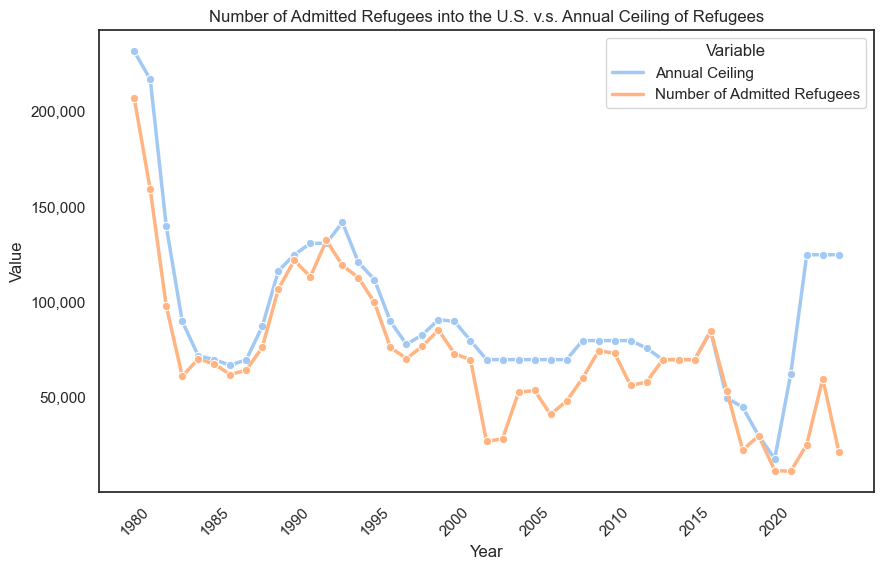

In [163]:
sns.set(style="white", palette="pastel", rc={"lines.linewidth": 2.5})
plt.figure(figsize=(10, 6))
line_plot = sns.lineplot(x='Year', y='Value', hue='Variable', marker='o', data=refugees_melted)

# Set plot labels and title
line_plot.set(xlabel='Year', ylabel='Value', title='Number of Admitted Refugees into the U.S. v.s. Annual Ceiling of Refugees')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))

plt.xticks(rotation=45)

# Format the y-axis labels with commas
line_plot.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,}'.format(int(x))))

# Show the plot
plt.show()